<a href="https://colab.research.google.com/github/TS0713/100-Days-ComputerVision/blob/main/First_MLP_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
os.getcwd()
path = "/content/drive/MyDrive/Datasets"
os.chdir(path)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import keras 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv(path+"/mobile_dataset/train.csv")
train_data.head()
X = train_data.iloc[:,:20].values
y = train_data.iloc[:,20].values.reshape(2000,-1)

scale_fun = StandardScaler().fit(X)
X = scale_fun.fit_transform(X)
cat_encoder = OneHotEncoder().fit(y)
y = cat_encoder.fit_transform(y).toarray()

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
test_data = pd.read_csv(path+"/mobile_dataset/test.csv")
test_data.head()
test_data_scaled = scale_fun.fit_transform(test_data.values)

In [ ]:
model = Sequential()
model.add(Dense(16,input_dim=20,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=100,batch_size=64,verbose=0)


7/7 [==============================] - 0s 1ms/step
Accuracy Score:  0.0


In [ ]:
y_test_prob = model.predict(x_test,verbose=0)
y_test_pred = []
for i in range(len(y_test_prob)):
  y_test_pred.append(np.argmax(y_test_prob[i]))
y_test_actual = []
for i in range(len(y_test)):
  y_test_actual.append(np.argmax(y_test[i]))

print ("Accuracy Score: ", accuracy_score(y_test_pred,y_test_actual))

Accuracy Score:  0.91


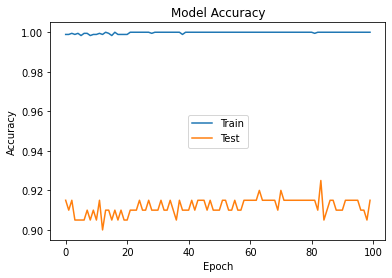

In [ ]:
#history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=0)
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="center")
plt.show()

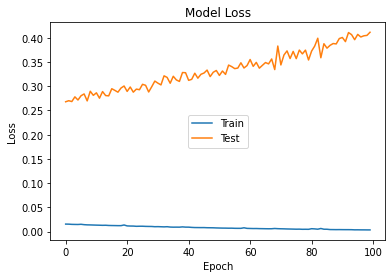

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="center")
plt.show()